In [8]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.dates as mdates


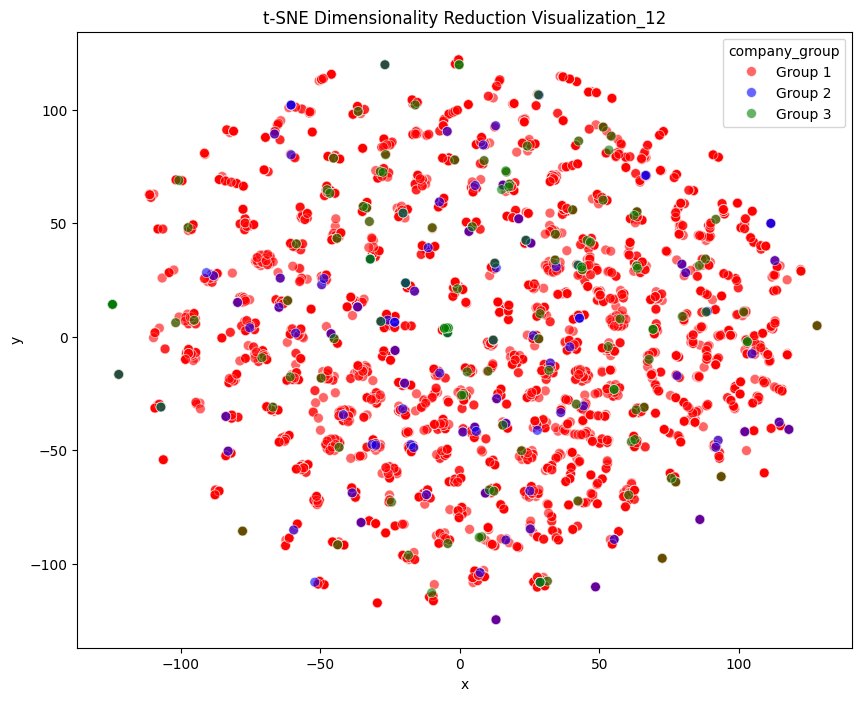

In [39]:
repo_embs_path = 'repo_embs.feather'
fs_bs_path = 'fs_bs.feather'
df_repo_embs = pd.read_feather(repo_embs_path)
df_fs_bs = pd.read_feather(fs_bs_path)

df_merged = pd.merge(df_repo_embs, df_fs_bs, on='repo_url', how='inner')

group_mapping = {
    'Google': 'Group 1', 'Amazon': 'Group 1', 'Facebook': 'Group 1', 'Apple': 'Group 1', 'Microsoft': 'Group 1',
    'IBM': 'Group 2', 'Tencent': 'Group 2', 'Intel': 'Group 2', 'Samsung': 'Group 2', 'Alibaba': 'Group 2',
    'OpenAI': 'Group 3', 'NVIDIA': 'Group 3', 'Huawei': 'Group 3', 'Salesforce': 'Group 3', 'Baidu': 'Group 3',
}
df_merged['company_group'] = df_merged['repo_url'].apply(lambda x: next((grp for key, grp in group_mapping.items() if key.lower() in x.lower()), 'Group 4'))

df_filtered = df_merged[df_merged['company_group'] != 'Group 4']

metrics = ['fs_m12', 'bs_m12', 'q_m12']
df_filtered = df_filtered[df_filtered[metrics].notna().all(axis=1)]

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_filtered[metrics])

df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
df_tsne['company_group'] = df_filtered['company_group']

df_tsne_sorted = df_tsne.copy()
df_tsne_sorted['order'] = df_tsne_sorted['company_group'].apply(lambda x: 1 if x == 'Group 1' else (2 if x == 'Group 2' else 3))
df_tsne_sorted = df_tsne_sorted.sort_values(by='order') 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='company_group', palette={'Group 1': 'red', 'Group 2': 'blue', 'Group 3': 'green'}, 
                data=df_tsne_sorted, alpha=0.6, s=50)
plt.title('t-SNE Dimensionality Reduction Visualization_12')
plt.show()

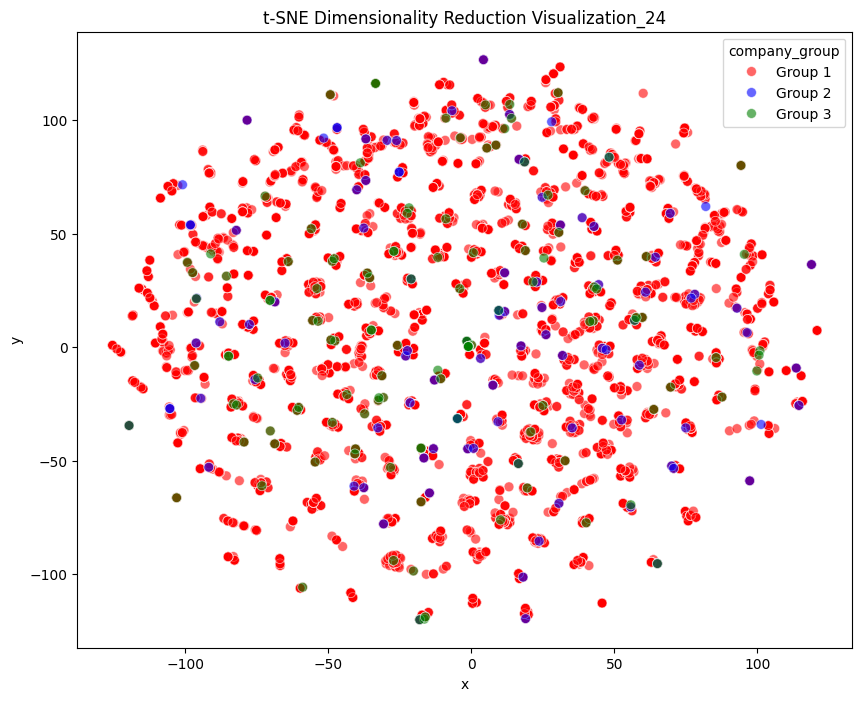

In [21]:
metrics = ['fs_m24', 'bs_m24', 'q_m24']
df_filtered = df_filtered[df_filtered[metrics].notna().all(axis=1)]

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_filtered[metrics])

df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
df_tsne['company_group'] = df_filtered['company_group']

df_tsne_sorted = df_tsne.copy()
df_tsne_sorted['order'] = df_tsne_sorted['company_group'].apply(lambda x: 1 if x == 'Group 1' else (2 if x == 'Group 2' else 3))
df_tsne_sorted = df_tsne_sorted.sort_values(by='order') 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='company_group', palette={'Group 1': 'red', 'Group 2': 'blue', 'Group 3': 'green'}, 
                data=df_tsne_sorted, alpha=0.6, s=50)
plt.title('t-SNE Dimensionality Reduction Visualization_24')
plt.show()

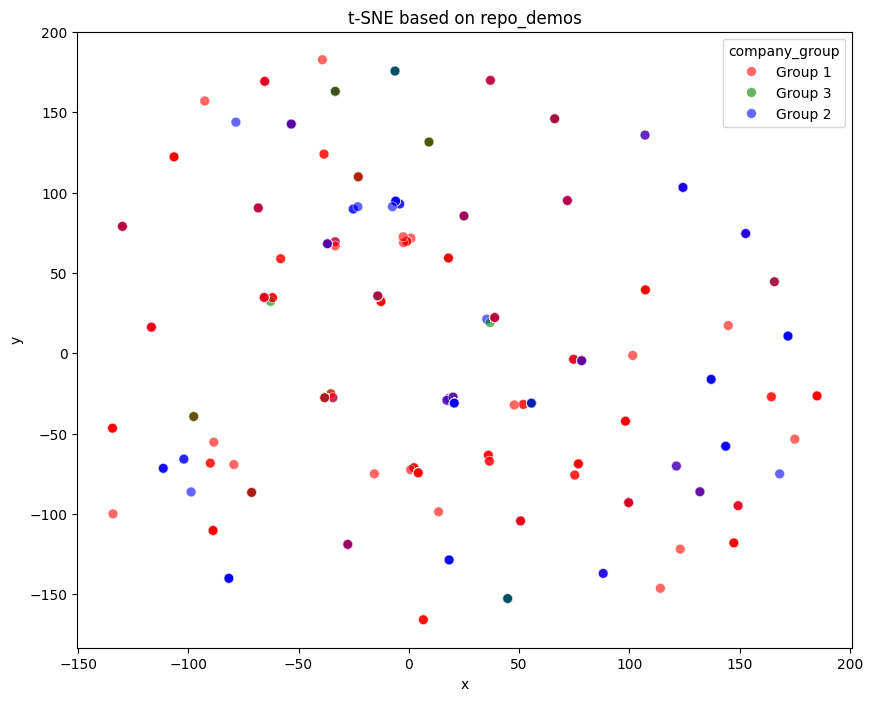

In [26]:
df_repo_embs['text_data'] = df_repo_embs['topic'] + ' ' + df_repo_embs['subfield']

model = SentenceTransformer('all-MiniLM-L6-v2') 
embeddings = model.encode(df_repo_embs['text_data'].tolist())

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings)

df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
df_tsne['company_group'] = df_repo_embs['repo_url'].apply(lambda x: next((grp for key, grp in group_mapping.items() if key.lower() in x.lower()), 'Group 4'))

df_tsne_filtered = df_tsne[df_tsne['company_group'] != 'Group 4']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='company_group', palette={'Group 1': 'red', 'Group 2': 'blue', 'Group 3': 'green'}, 
                data=df_tsne_filtered, alpha=0.6, s=50)
plt.title('t-SNE based on repo_demos')
plt.show()

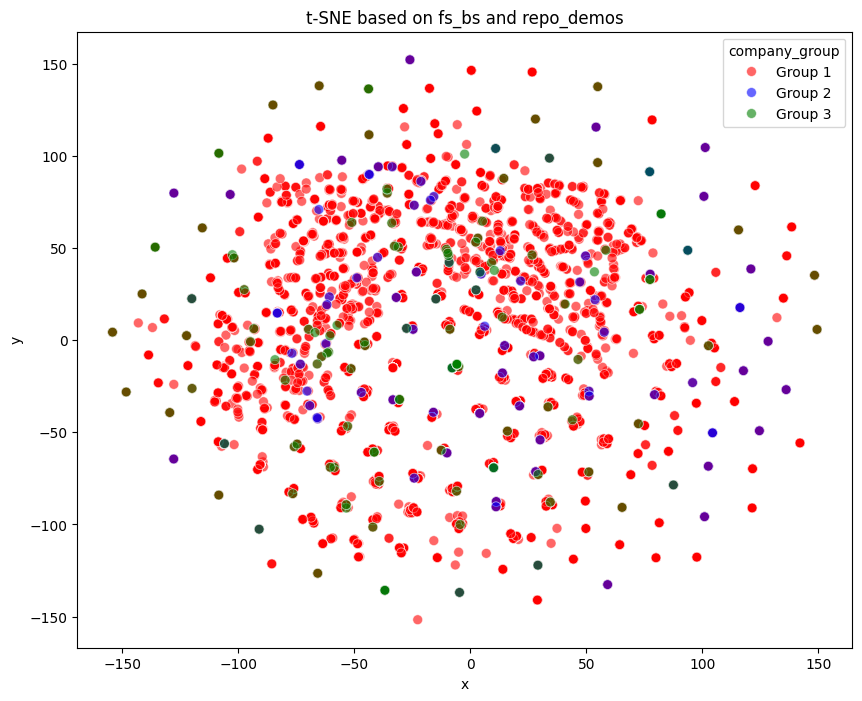

In [28]:
numerical_features = ['fs_m12', 'bs_m12', 'q_m12', 'fs_m24', 'bs_m24', 'q_m24']
df_filtered = df_filtered.dropna(subset=numerical_features)

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df_filtered[numerical_features])

df_filtered['text_data'] = df_filtered['topic'] + ' ' + df_filtered['subfield']
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df_filtered['text_data'].tolist())

combined_features = pd.concat([pd.DataFrame(scaled_numerical_features), pd.DataFrame(text_embeddings)], axis=1)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(combined_features)

df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
df_tsne['company_group'] = df_filtered['company_group']

df_tsne['order'] = df_tsne['company_group'].apply(lambda x: 1 if x == 'Group 1' else (2 if x == 'Group 2' else 3))
df_tsne_sorted = df_tsne.sort_values(by='order')

plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='company_group', palette={'Group 1': 'red', 'Group 2': 'blue', 'Group 3': 'green'}, 
                data=df_tsne_sorted, alpha=0.6, s=50)
plt.title('t-SNE based on fs_bs and repo_demos')
plt.show()

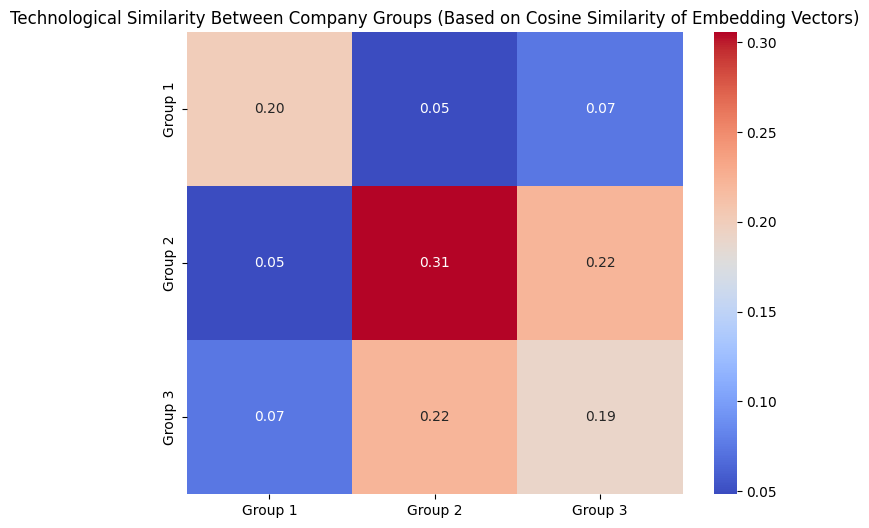

Similarity Matrix Between Company Groups
          Group 1   Group 2   Group 3
Group 1  0.200953  0.048267  0.074109
Group 2  0.048267  0.305650  0.221889
Group 3  0.074109  0.221889  0.190394


In [33]:
df_merged = pd.merge(df_repo_embs, df_fs_bs, on='repo_url', how='inner')

df_merged['company_group'] = df_merged['repo_url'].apply(lambda x: next((grp for key, grp in group_mapping.items() if key.lower() in x.lower()), 'Group 4'))

df_filtered = df_merged[df_merged['company_group'] != 'Group 4'].reset_index(drop=True)

numerical_features = ['fs_m12', 'bs_m12', 'q_m12', 'fs_m24', 'bs_m24', 'q_m24']
df_filtered = df_filtered.dropna(subset=numerical_features)

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df_filtered[numerical_features])

df_filtered['text_data'] = df_filtered['topic'] + ' ' + df_filtered['subfield']
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df_filtered['text_data'].tolist())

combined_features = np.hstack([scaled_numerical_features, text_embeddings])

group_1_embeddings = combined_features[df_filtered['company_group'] == 'Group 1']
group_2_embeddings = combined_features[df_filtered['company_group'] == 'Group 2']
group_3_embeddings = combined_features[df_filtered['company_group'] == 'Group 3']

group_names = ['Group 1', 'Group 2', 'Group 3']
group_embeddings = [group_1_embeddings, group_2_embeddings, group_3_embeddings]

similarity_matrix = np.zeros((len(group_names), len(group_names)))

for i, group_i_embeddings in enumerate(group_embeddings):
    for j, group_j_embeddings in enumerate(group_embeddings):
        if i == j:
            similarity = cosine_similarity(group_i_embeddings).mean()
        else:
            similarity = cosine_similarity(group_i_embeddings, group_j_embeddings).mean()
        similarity_matrix[i, j] = similarity

df_similarity = pd.DataFrame(similarity_matrix, index=group_names, columns=group_names)

plt.figure(figsize=(8, 6))
sns.heatmap(df_similarity, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Technological Similarity Between Company Groups (Based on Cosine Similarity of Embedding Vectors)')
plt.show()

print("Similarity Matrix Between Company Groups")
print(df_similarity)

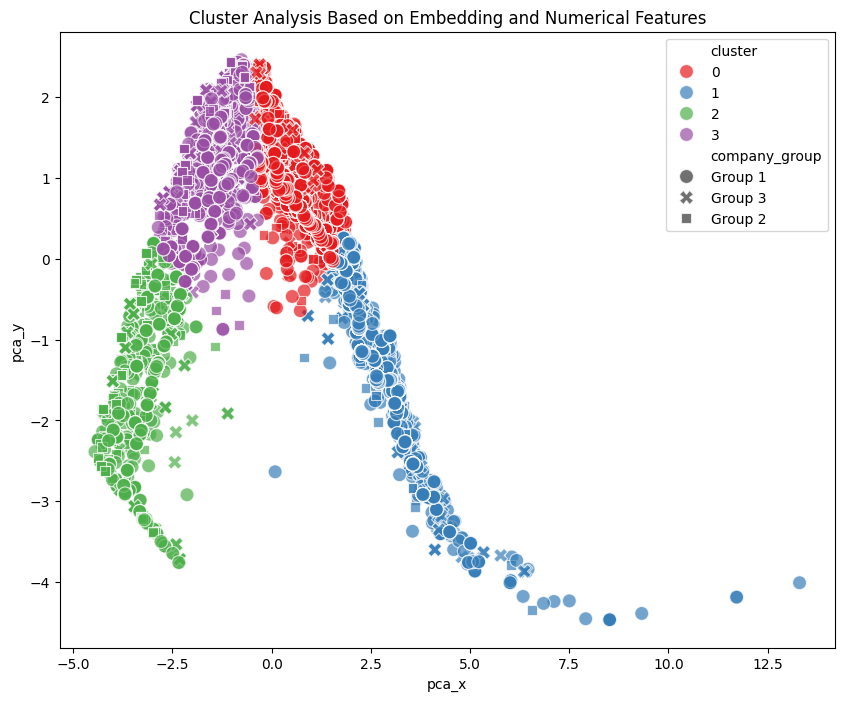

Cluster distribution for Group 1:
cluster
0    9681
1    6847
2    4256
3    5200
Name: count, dtype: int64


Cluster distribution for Group 3:
cluster
0    311
1    132
2    209
3    308
Name: count, dtype: int64


Cluster distribution for Group 2:
cluster
0    309
1     83
2    476
3    737
Name: count, dtype: int64




In [38]:
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(combined_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_features)
df_filtered['pca_x'] = pca_result[:, 0]
df_filtered['pca_y'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', style='company_group', palette='Set1', data=df_filtered, s=100, alpha=0.7)
plt.title('Cluster Analysis Based on Embedding and Numerical Features')
plt.show()

for group in df_filtered['company_group'].unique():
    group_data = df_filtered[df_filtered['company_group'] == group]
    cluster_distribution = group_data['cluster'].value_counts().sort_index()
    print(f"Cluster distribution for {group}:")
    print(cluster_distribution)
    print("\n")

/var/folders/0r/l5m4n5m135q717d1br283d280000gn/T/ipykernel_6906/2041137773.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_period'] = df['date'].dt.to_period(time_period)
/var/folders/0r/l5m4n5m135q717d1br283d280000gn/T/ipykernel_6906/2041137773.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_period'] = df['date'].dt.to_period(time_period)
/var/folders/0r/l5m4n5m135q717d1br283d280000gn/T/ipykernel_6906/2041137773.py:22: SettingWithCopyWarning: 
A value is trying to be set on a co

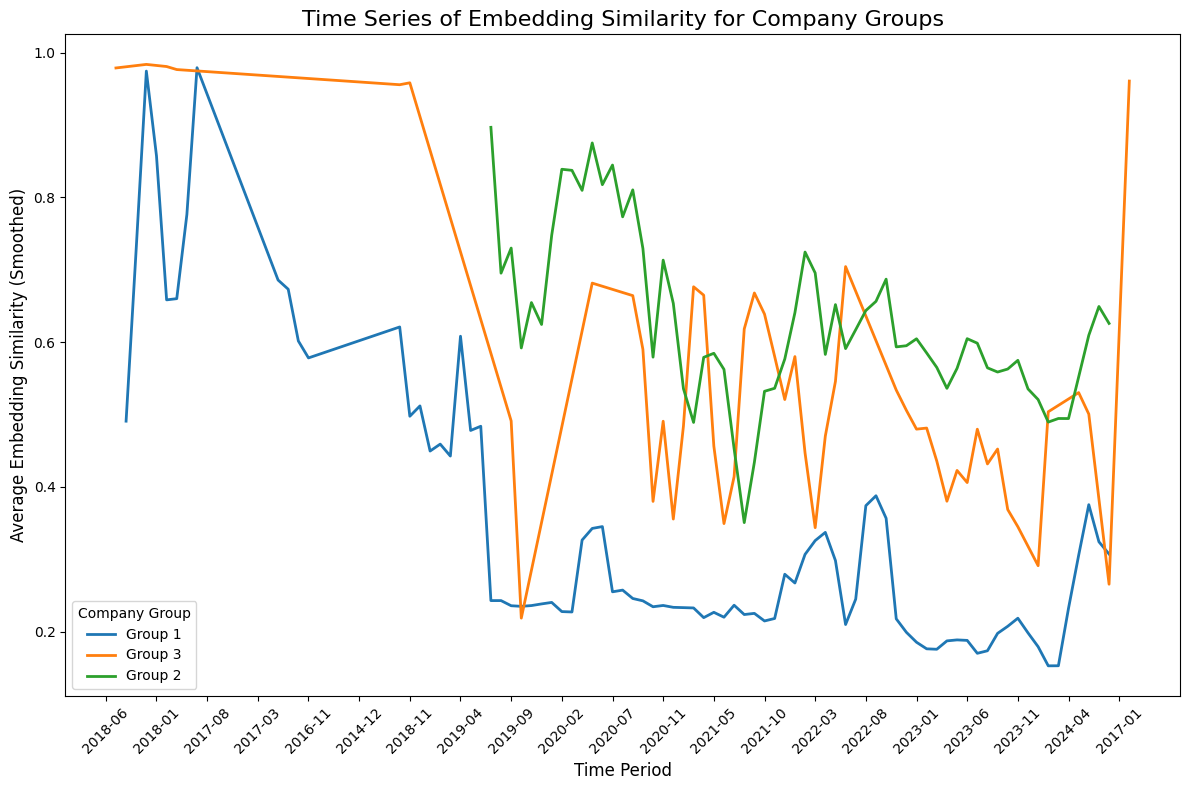

In [42]:
df_merged = pd.merge(df_repo_embs, df_fs_bs, on='repo_url', how='inner')

df_merged['date'] = pd.to_datetime(df_merged['date'])

df_merged['company_group'] = df_merged['repo_url'].apply(lambda x: next((grp for key, grp in group_mapping.items() if key.lower() in x.lower()), 'Group 4'))

df_filtered = df_merged[df_merged['company_group'] != 'Group 4'].reset_index(drop=True)

numerical_features = ['fs_m12', 'bs_m12', 'q_m12', 'fs_m24', 'bs_m24', 'q_m24']
df_filtered = df_filtered.dropna(subset=numerical_features)

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df_filtered[numerical_features])

df_filtered['text_data'] = df_filtered['topic'] + ' ' + df_filtered['subfield']
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df_filtered['text_data'].tolist())

combined_features = np.hstack([scaled_numerical_features, text_embeddings])

def calculate_average_similarity(df, time_period='M'):
    df['time_period'] = df['date'].dt.to_period(time_period)
    average_similarities = []

    for period in df['time_period'].unique():
        period_data = df[df['time_period'] == period]
        if len(period_data) > 1:
            embeddings = combined_features[period_data.index]
            similarity_matrix = cosine_similarity(embeddings)
            avg_similarity = np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])
        else:
            avg_similarity = np.nan 
        average_similarities.append((period, avg_similarity))
    
    return pd.DataFrame(average_similarities, columns=['time_period', 'avg_similarity'])

plt.figure(figsize=(12, 8))

group_similarities = {}
for group in df_filtered['company_group'].unique():
    group_data = df_filtered[df_filtered['company_group'] == group]
    group_similarities[group] = calculate_average_similarity(group_data)

for group, similarity_df in group_similarities.items():
    similarity_df['avg_similarity_smooth'] = similarity_df['avg_similarity'].rolling(window=3).mean()
    sns.lineplot(x=similarity_df['time_period'].astype(str), y=similarity_df['avg_similarity_smooth'], label=group, linewidth=2)

plt.title('Time Series of Embedding Similarity for Company Groups', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Average Embedding Similarity (Smoothed)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Company Group')
plt.tight_layout()

locs, labels = plt.xticks()
plt.xticks(ticks=locs[::5], labels=[l.get_text() for l in labels][::5])

plt.show()

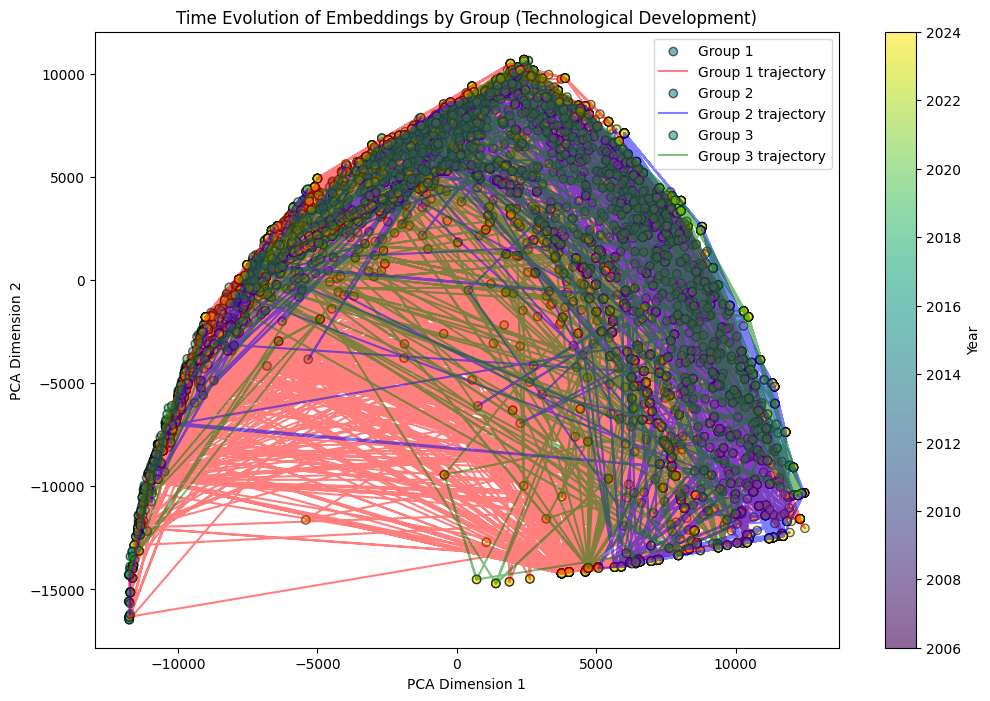

In [47]:
df_merged['date'] = pd.to_datetime(df_merged['date'], format='%Y-%m')

features = ['fs_m12', 'bs_m12', 'q_m12', 'fs_m24', 'bs_m24', 'q_m24']

df_filled = df_merged.copy()
df_filled[features] = df_filled[features].fillna(df_filled[features].mean())

embeddings = df_filled[features].values

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

df_filled['pca_dim1'] = embeddings_2d[:, 0]
df_filled['pca_dim2'] = embeddings_2d[:, 1]

plt.figure(figsize=(12, 8))

time_periods = df_filled['date'].unique()
cmap = plt.get_cmap('viridis')

min_year = df_filled['date'].dt.year.min()
max_year = df_filled['date'].dt.year.max()
norm = plt.Normalize(vmin=min_year, vmax=max_year)

group_colors = {
    'Group 1': 'red',
    'Group 2': 'blue',
    'Group 3': 'green'
}

for group in ['Group 1', 'Group 2', 'Group 3']:
    group_data = df_filled[df_filled['company_group'] == group]
    group_data = group_data.sort_values('date')
    
    time_values = group_data['date'].dt.year
    colors = cmap(norm(time_values))

    scatter = plt.scatter(group_data['pca_dim1'], group_data['pca_dim2'], 
                          c=time_values, cmap='viridis', alpha=0.6, 
                          edgecolor='k', norm=norm, label=group)

    plt.plot(group_data['pca_dim1'], group_data['pca_dim2'], 
             color=group_colors[group], alpha=0.5, 
             label=f'{group} trajectory')

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Time Evolution of Embeddings by Group (Technological Development)')

plt.legend()
plt.show()


Group 1 demonstrates significant technological diversity with a broad distribution in the embedding space and rapid technological migration over time. This indicates active expansion into multiple technological fields, especially in recent years.

Group 2 exhibits stronger internal consistency with a more focused technological trajectory. While there is some movement, the group tends to concentrate its projects within specific, consistent technical areas.

Group 3 maintains stable technological growth, with its projects showing more concentrated development. The group has relatively steady progress with less fluctuation compared to Group 1.

To deepen the analysis of company groups' technological development, the following key areas are suggested:

Internal Technical Trends: Analyze how each group's technical focus evolves, identifying key project contributors and shifts in technology over time.

Technological Breakthroughs: Identify moments of innovation by focusing on sharp changes in similarity, and use time series data to predict future breakthroughs.